## 주택가격 데이터에서 실제 존재하는 이상치를 찾아서 정제하시오

In [3]:
import pandas as pd
df = pd.read_csv('house_raw.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17914 entries, 0 to 17913
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   housing_age  17914 non-null  int64  
 1   income       17914 non-null  float64
 2   bedrooms     17914 non-null  float64
 3   households   17914 non-null  float64
 4   rooms        17914 non-null  float64
 5   house_value  17914 non-null  int64  
dtypes: float64(4), int64(2)
memory usage: 839.8 KB


17914개의 튜플(행)  
6개의 열  

housig_age(주택나이): 정수  
income(소득): 실수  
bedromms(침실 개수): 실수  
households(가정): 실수  
rooms(방): 실수  
house_value(집값): 정수

In [4]:
df.describe()

,housing_age,income,bedrooms,households,rooms,house_value
count,17914.000000,17914.000000,17914.000000,17914.000000,17914.000000,17914.000000
mean,27.307022,3.664086,0.214309,3.007667,5.370672,188692.620130
std,11.297204,1.526694,0.055251,4.579534,2.332776,95318.621139
min,1.000000,0.499900,0.100000,0.692308,0.846154,14999.000000
25%,18.000000,2.526125,0.177544,2.467031,4.426115,114325.000000
50%,28.000000,3.447800,0.204256,2.853499,5.199222,170800.000000
75%,36.000000,4.583300,0.240476,3.318866,5.970848,242100.000000
max,51.000000,9.905500,1.000000,599.714286,132.533333,500000.000000


bedrooms, households, rooms에 큰 값들이 있다.

array([[<AxesSubplot:title={'center':'housing_age'}>,
        <AxesSubplot:title={'center':'income'}>],
       [<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'households'}>],
       [<AxesSubplot:title={'center':'rooms'}>,
        <AxesSubplot:title={'center':'house_value'}>]], dtype=object)

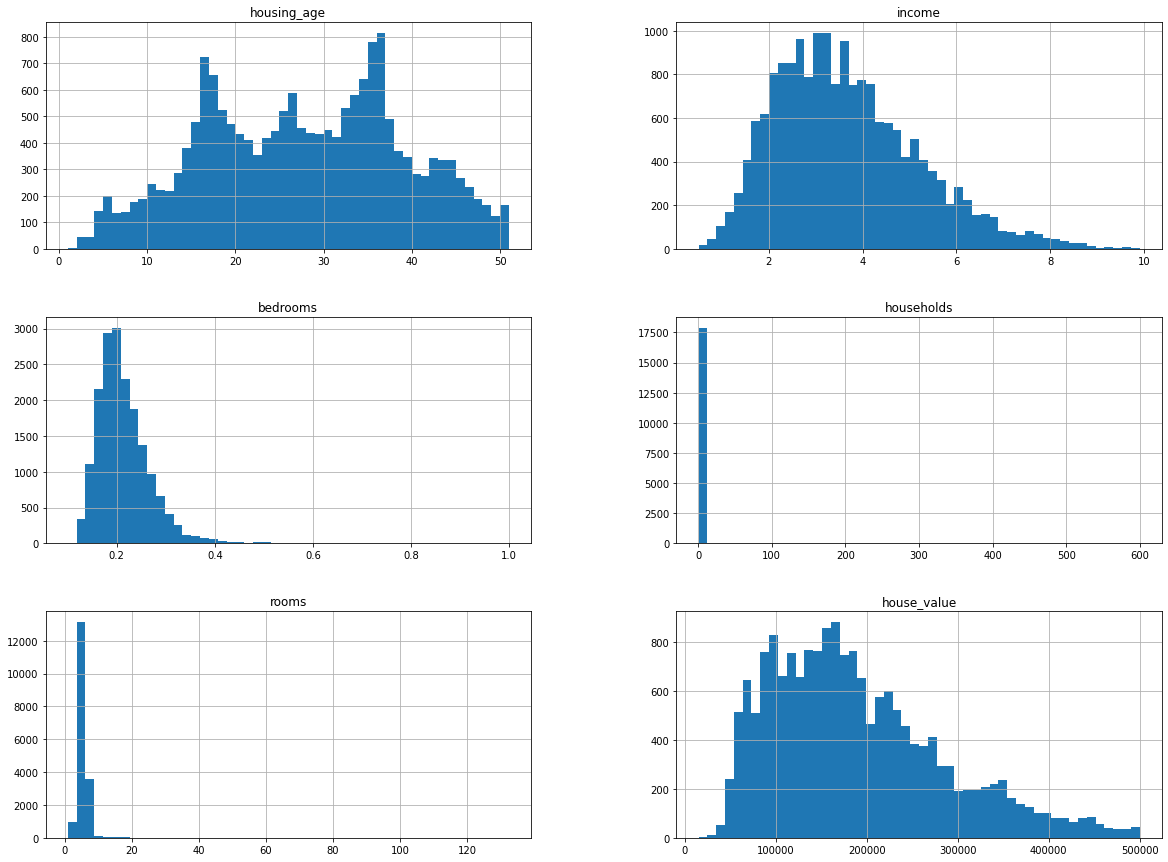

In [5]:
df.hist(bins=50, figsize=(20,15))

1. 데이터 나누기

In [6]:
x=df[df.columns[0:5]]
y=df[["house_value"]]

2. 학습용데이터와 테스트용데이터를 구분해주는 도구 가져오기

In [9]:
!pip install sklearn

     |████████████████████████████████| 8.5 MB 1.9 MB/s eta 0:00:01
  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
     |████████████████████████████████| 55.3 MB 10.0 MB/s eta 0:00:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=2963e4b56c60ebf4a36db34079cb4ba3e575bd720010479ef70180ab6325ab91
  Stored in directory: /Users/namhyebin/Library/Caches/pip/wheels/22/0b/40/fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn


In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, random_state=42)

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler_minmax = MinMaxScaler()
scaler_minmax.fit(x_train)
x_scaled_minmax_train=scaler_minmax.transform(x_train)
x_scaled_minmax_train=scaler_minmax.transform(x_test)

In [18]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_scaled_minmax_train, y_train)

ValueError: Found input variables with inconsistent numbers of samples: [4479, 13435]

In [16]:
LinearRegression()

LinearRegression()